# Exploration Datasets & Graph

## Preliminary Operations

In [17]:
import pandas as pd
import numpy as np
import networkx as nx
import pickle
import ast
import matplotlib.pyplot as plt
from collections import Counter



## Dataset Claims

In [27]:
df_triple = pd.read_csv('C:\\Users\\Simone\\Documents\\Desktop\\Tesi_Magistrale\\triple_health.csv')
df_triple.head()

,Unnamed: 0,claim_id,claim,date_published,explanation,fact_checkers,main_text,sources,label,subjects,triplets
0,1,9893,Annual Mammograms May Have More False-Positives,"October 18, 2011",This article reports on the results of a study...,,While the financial costs of screening mammogr...,,mixture,"Screening,WebMD,women's health","[{'head': 'False-Positives', 'type': 'facet of..."
1,2,11358,SBRT Offers Prostate Cancer Patients High Canc...,"September 28, 2016",This news release describes five-year outcomes...,"Mary Chris Jaklevic,Steven J. Atlas, MD, MPH,K...",The news release quotes lead researcher Robert...,https://www.healthnewsreview.org/wp-content/up...,mixture,"Association/Society news release,Cancer","[{'head': 'SBRT', 'type': 'medical condition t..."
2,3,10166,"Study: Vaccine for Breast, Ovarian Cancer Has ...","November 8, 2011","While the story does many things well, the ove...",,"The story does discuss costs, but the framing ...",http://clinicaltrials.gov/ct2/results?term=can...,true,"Cancer,WebMD,women's health","[{'head': 'Ovarian Cancer', 'type': 'has part'..."
3,5,8713,Britain to reveal trial criteria for coronavir...,"April 7, 2020",British regulators will this week reveal appro...,Alistair Smout,Antibody tests show whether whether people hav...,,true,Health News,"[{'head': 'coronavirus', 'type': 'has effect',..."
4,7,2768,U.S. says results encouraging for healthcare d...,"January 30, 2014",The Obama administration on Thursday reported ...,David Morgan,As part of President Barack Obama’s healthcare...,,true,Health News,"[{'head': 'healthcare delivery reforms', 'type..."


In [28]:
df_triple.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      6019 non-null   int64 
 1   claim_id        6019 non-null   object
 2   claim           6019 non-null   object
 3   date_published  4366 non-null   object
 4   explanation     6019 non-null   object
 5   fact_checkers   6018 non-null   object
 6   main_text       6010 non-null   object
 7   sources         6009 non-null   object
 8   label           6010 non-null   object
 9   subjects        6010 non-null   object
 10  triplets        6019 non-null   object
dtypes: int64(1), object(10)
memory usage: 517.4+ KB


In [29]:
# Convertiamo 'head, type & tail' come sono segnati nel grafo PREDICATE,SUBJECT_NAME,OBJECT_NAME 

# Assicurati che la colonna 'triplets' contenga liste invece di stringhe
df_triple['triplets'] = df_triple['triplets'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])

# Applica la funzione solo alle liste non vuote
df_triple['triplets'] = df_triple['triplets'].apply(lambda triple: [{'SUBJECT_NAME': t['head'], 'PREDICATE': t['type'], 'OBJECT_NAME': t['tail']} for t in triple] if triple else [])

#Applica la funzione che rende tutto maisucolo il predicato e aggiunge il trattino basso
df_triple['triplets'] = df_triple['triplets'].apply(lambda triple: [{'SUBJECT_NAME': t['SUBJECT_NAME'], 'PREDICATE': t['PREDICATE'].upper().replace(' ', '_'), 'OBJECT_NAME': t['OBJECT_NAME']} for t in triple] if triple else [])



In [30]:
df_triple[['claim', 'label', 'triplets']]

,claim,label,triplets
0,Annual Mammograms May Have More False-Positives,mixture,"[{'SUBJECT_NAME': 'False-Positives', 'PREDICAT..."
1,SBRT Offers Prostate Cancer Patients High Canc...,mixture,"[{'SUBJECT_NAME': 'SBRT', 'PREDICATE': 'MEDICA..."
2,"Study: Vaccine for Breast, Ovarian Cancer Has ...",true,"[{'SUBJECT_NAME': 'Ovarian Cancer', 'PREDICATE..."
3,Britain to reveal trial criteria for coronavir...,true,"[{'SUBJECT_NAME': 'coronavirus', 'PREDICATE': ..."
4,U.S. says results encouraging for healthcare d...,true,[{'SUBJECT_NAME': 'healthcare delivery reforms...
...,...,...,...
6014,Venezuela expands quarantine as number of coro...,true,"[{'SUBJECT_NAME': 'quarantine', 'PREDICATE': '..."
6015,The Sturgis motorcycle rally in 2020 resulted ...,unproven,"[{'SUBJECT_NAME': 'COVID-19 coronavirus', 'PRE..."
6016,AstraZeneca's infant respiratory drug prioriti...,true,"[{'SUBJECT_NAME': 'AstraZeneca', 'PREDICATE': ..."
6017,Testicular cancer deaths double with after 40 ...,true,[{'SUBJECT_NAME': 'death double with after 40 ...


In [31]:
with pd.option_context('max_colwidth', None,):
    print(df_triple[['triplets',]])

                                                                                                                                                                                                                                                                                                                                                                                                   triplets
0                                                                                                    [{'SUBJECT_NAME': 'False-Positives', 'PREDICATE': 'FACET_OF', 'OBJECT_NAME': 'Annual Mammograms'}, {'SUBJECT_NAME': 'False-Positives', 'PREDICATE': 'PART_OF', 'OBJECT_NAME': 'Annual Mammograms'}, {'SUBJECT_NAME': 'False-Positives', 'PREDICATE': 'SUBCLASS_OF', 'OBJECT_NAME': 'False-Positives'}]
1     [{'SUBJECT_NAME': 'SBRT', 'PREDICATE': 'MEDICAL_CONDITION_TREATED', 'OBJECT_NAME': 'Prostate Cancer'}, {'SUBJECT_NAME': 'SBRT', 'PREDICATE': 'MEDICAL_CONDITION_TREATED', 'OBJECT_NAME': 'Prostate Cancer'

In [41]:
# Lista di stopwords comuni in inglese
stopwords = set(['in', 'to', 'for', 'of', 'and', 'on', 'with', 'as', 'by', 'at', 'from', 'that', 'a', 'the', 'an', 'Of'])

# Funzione per rimuovere le stopwords da una lista di parole
def remove_stopwords(word_list):
    return [word for word in word_list if word.lower() not in stopwords]

# Filtraggio delle parole in soggetti, predicati e oggetti per rimuovere le stopwords
filtered_subjects = remove_stopwords(subjects)
filtered_predicates = remove_stopwords(predicates)
filtered_objects = remove_stopwords(objects)

# Conteggio delle parole per creare una Bag of Words per ciascuna categoria
bow_subjects = Counter(filtered_subjects)
bow_predicates = Counter(filtered_predicates)
bow_objects = Counter(filtered_objects)

# Visualizzazione delle top 10 parole per ciascuna categoria
(bow_subjects.most_common(20), bow_predicates.most_common(20), bow_objects.most_common(20))

([('coronavirus', 273),
  ('COVID-19', 199),
  ('HIV', 93),
  ('Donald Trump', 84),
  ('vaccine', 73),
  ('breast cancer', 68),
  ('China', 65),
  ('medical marijuana', 64),
  ('health care', 59),
  ('Medicaid', 58),
  ('President', 58),
  ('drug', 55),
  ('Planned Parenthood', 55),
  ('Barack Obama', 50),
  ('Medicare', 49),
  ('CDC', 48),
  ('Ebola', 47),
  ('flu', 40),
  ('United States', 40),
  ('abortion', 39)],
 [('FACET_OF', 1706),
  ('COUNTRY', 1501),
  ('SUBCLASS_OF', 1488),
  ('HAS_EFFECT', 1268),
  ('INSTANCE_OF', 1183),
  ('MEDICAL_CONDITION_TREATED', 968),
  ('LOCATED_IN_THE_ADMINISTRATIVE_TERRITORIAL_ENTITY', 895),
  ('HAS_CAUSE', 771),
  ('DRUG_USED_FOR_TREATMENT', 763),
  ('HAS_PART', 626),
  ('APPLIES_TO_JURISDICTION', 608),
  ('MAIN_SUBJECT', 533),
  ('PART_OF', 521),
  ('LOCATION', 412),
  ('DIFFERENT_FROM', 412),
  ('POINT_IN_TIME', 346),
  ('POSITION_HELD', 317),
  ('PRODUCT_OR_MATERIAL_PRODUCED', 313),
  ('FIELD_OF_WORK', 285),
  ('PARTICIPANT', 273)],
 [('coronav

In [37]:
# Estrarre nuovamente soggetti, predicati e oggetti con i nomi dei campi aggiornati
subjects = []
predicates = []
objects = []

for triple_list in df_triple['triplets']:
    for triple in triple_list:
        subjects.append(triple['SUBJECT_NAME'])
        predicates.append(triple['PREDICATE'])
        objects.append(triple['OBJECT_NAME'])

# Conteggio del numero totale per ciascuna categoria
total_subjects = len(subjects)
total_predicates = len(predicates)
total_objects = len(objects)

# Conteggio delle frequenze delle parole
word_freq_subjects = Counter(" ".join(subjects).split())
word_freq_predicates = Counter(" ".join(predicates).split())
word_freq_objects = Counter(" ".join(objects).split())

# Conteggio dei valori unici
unique_subjects = len(set(subjects))
unique_predicates = len(set(predicates))
unique_objects = len(set(objects))

(total_subjects, total_predicates, total_objects, unique_subjects, unique_predicates, unique_objects), (word_freq_subjects.most_common(5), word_freq_predicates.most_common(5), word_freq_objects.most_common(5))


((20270, 20270, 20270, 9218, 172, 6776),
 ([('coronavirus', 781),
   ('in', 655),
   ('health', 571),
   ('of', 553),
   ('cancer', 448)],
  [('FACET_OF', 1706),
   ('COUNTRY', 1501),
   ('SUBCLASS_OF', 1488),
   ('HAS_EFFECT', 1268),
   ('INSTANCE_OF', 1183)],
  [('cancer', 617),
   ('health', 331),
   ('drug', 295),
   ('Cancer', 284),
   ('coronavirus', 280)]))

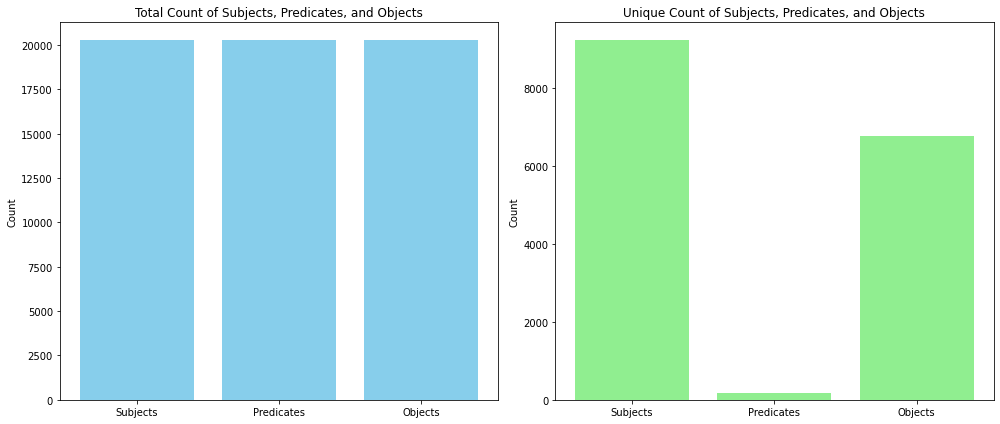

In [38]:
# Creazione degli istogrammi per le metriche calcolate
# Preparazione dei dati per gli istogrammi
categories = ['Subjects', 'Predicates', 'Objects']
total_counts = [total_subjects, total_predicates, total_objects]
unique_counts = [unique_subjects, unique_predicates, unique_objects]

# Creazione degli istogrammi
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Istogramma per il conteggio totale
axes[0].bar(categories, total_counts, color='skyblue')
axes[0].set_title('Total Count of Subjects, Predicates, and Objects')
axes[0].set_ylabel('Count')

# Istogramma per il conteggio dei valori unici
axes[1].bar(categories, unique_counts, color='lightgreen')
axes[1].set_title('Unique Count of Subjects, Predicates, and Objects')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

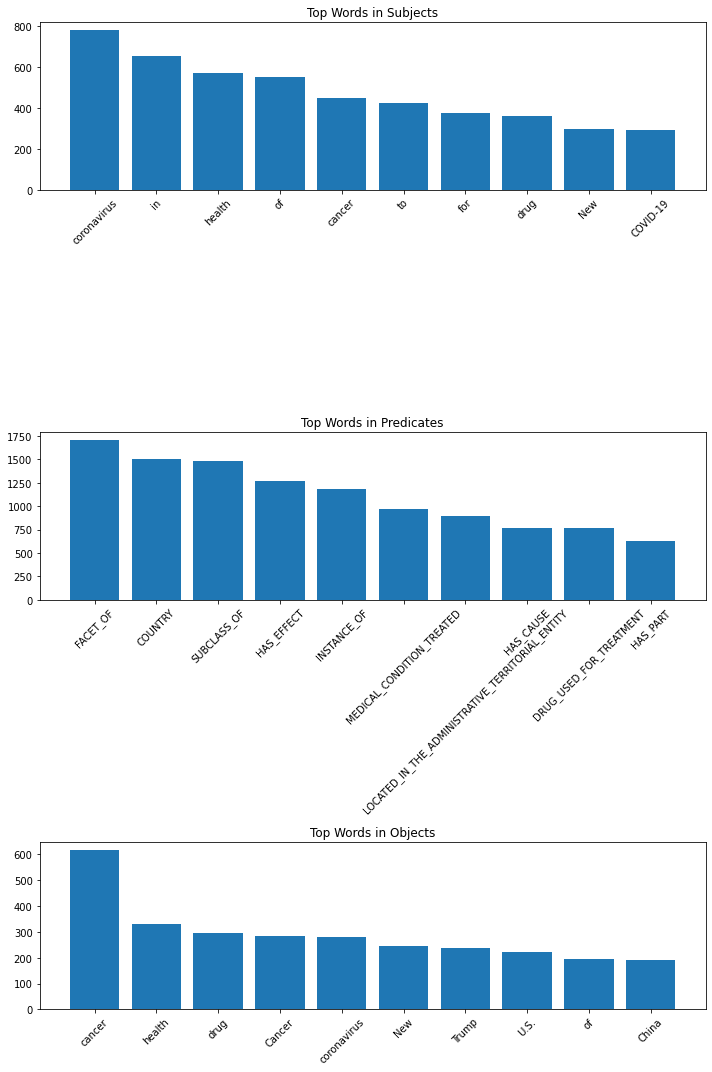

In [39]:
# Funzione per creare grafici a barre delle parole più frequenti
def plot_top_words(word_freq, title, ax, num_top_words=10):
    top_words = word_freq.most_common(num_top_words)
    words, counts = zip(*top_words)
    ax.bar(words, counts)
    ax.set_title(title)
    ax.tick_params(axis='x', rotation=45)

# Creazione dei grafici
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Grafico per le parole più frequenti nei soggetti
plot_top_words(word_freq_subjects, 'Top Words in Subjects', axes[0])

# Grafico per le parole più frequenti nei predicati
plot_top_words(word_freq_predicates, 'Top Words in Predicates', axes[1])

# Grafico per le parole più frequenti negli oggetti
plot_top_words(word_freq_objects, 'Top Words in Objects', axes[2])

plt.tight_layout()
plt.show()

In [40]:
word_freq_subjects.most_common


<bound method Counter.most_common of Counter({'coronavirus': 781, 'in': 655, 'health': 571, 'of': 553, 'cancer': 448, 'to': 428, 'for': 376, 'drug': 364, 'New': 298, 'COVID-19': 295, 'vaccine': 289, 'care': 275, 'Cancer': 263, 'flu': 254, 'disease': 225, 'outbreak': 225, 'Trump': 204, 'the': 203, 'medical': 189, 'Drug': 185, 'death': 180, 'marijuana': 179, 'test': 172, 'virus': 168, 'on': 160, 'treatment': 159, 'breast': 155, 'Health': 149, 'a': 136, 'therapy': 131, 'HIV': 128, 'China': 128, 'cases': 126, 'abortion': 123, 'new': 122, 'Ebola': 117, 'pandemic': 114, 'and': 112, 'opioid': 110, 'with': 110, 'hospital': 106, 'deaths': 105, 'Donald': 102, 'Treatment': 100, 'case': 99, 'vaping': 95, 'US': 95, 'Medicaid': 94, 'Obama': 91, 'mental': 90, 'heart': 88, 'Medicare': 88, 'Breast': 85, 'law': 83, 'from': 82, 'A': 82, 'Heart': 81, 'President': 81, 'by': 80, 'drugs': 79, 'lockdown': 77, 'ban': 76, 'crisis': 75, 'Test': 75, 'U.S.': 75, 'John': 74, 'state': 74, 'bill': 74, 'Prostate': 73,

In [ ]:
word_freq_predicates.most_common

In [ ]:
word_freq_objects.most_common

## Dataset Knowledge Graph

## Knowledge Graph